### 1. Import Needed Libraries
<pre>
Input   : -
Output  : -
Process :
Import some needed Python libraries and models such as
    1. OS : Document directory management and Path manipulation. 
    2. Time : Timing of program operations.  
    3. Pandas: Read CSV files and write them into data frames. 
    4. WebDriver: Controls the website browser. 
    5. BY : Define element selection criteria with Xpath. 
    6. WebDriverWait : Pauses the WebDriver process. 
    7. Expected_Conditions : Checks the elements in the Document Object Model. 
    8. ActionChains : Automate website element click commands.
    9. Common Exeptions : Provides various types of exceptions that can be used to handle errors.
    10. NoSuchElementException : Processes are excluded when no element is searched. 
    11. TimeoutException : Processes are excluded when the web's load time exceeds the limit.
</pre>

In [ ]:
import os
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, TimeoutException

### 2. Run Scraping Program
<pre>
Input   : Product Links
Output  : image_link.csv (containing image links of each product variant and elements "alt" of the image)
Process :
Open the product_links.txt file and read all the links.
    1. Initialize Selenium WebDriver.
    2. Specify the directory to store the images.
    3. Wait for all elements to load on the website.
    4. Pressing all the Close pop up buttons.
    5. Find the variant size element, if it exists then the program will record each link from the product image along with the “alt” element text that the image has to the image_link.csv file.
    6. If it doesn't exist, it will find the Shade variant element by using the XPath pattern. If the element is found, press the variant button from the first then record the image link into the image_link.csv file.
    7. Print the links that were successfully or unsuccessfully deleted.

</pre>

Diagram alur program scraping:
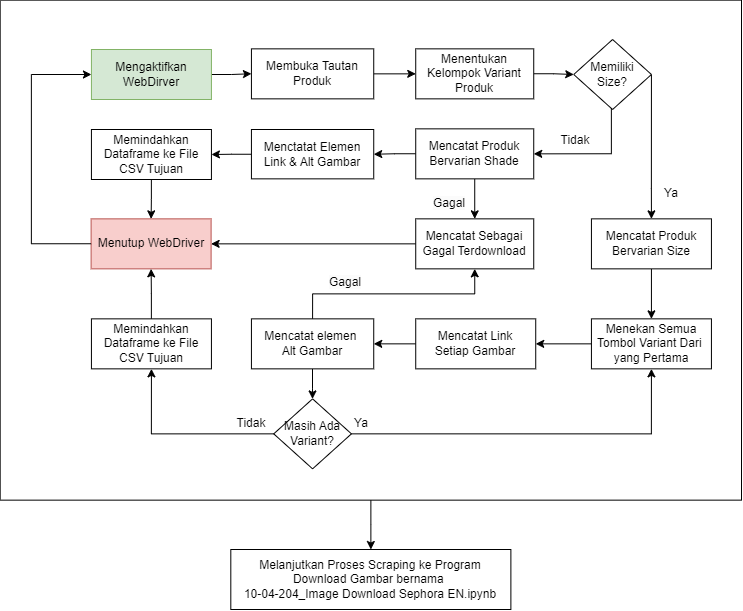

In [8]:
import os
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, TimeoutException

def restart_webdriver():
    global driver
    driver.quit()
    driver = webdriver.Chrome()
    driver.maximize_window()

with open("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\VariantSizeOnly.txt", "r") as file:
    links = file.readlines()

base_directory = "D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\product_images"

success_links = []
failed_links = []

image_info_list = []

image_info_df = pd.DataFrame(columns=["web_link", "image_link", "alt"])

if os.path.exists("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\image_link.csv"):
    image_info_df = pd.read_csv("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\image_link.csv")


for link in links:
    print(f"Memproses link: {link}")
    
    link = link.strip()

    try:
        driver.get(link)
        try:
            modal_close_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[data-at='modal_close']")))
            modal_close_button.click()
        except TimeoutException:
            print("")

        try:
            close_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[data-at='close_button']")))
            close_button.click()
        except TimeoutException:
            print("")
        time.sleep(10)

        if "Sorry, this product is not available." in driver.page_source:
            print("Produk tidak tersedia:", link)
            failed_links.append({"link": link, "reason": "Produk tidak tersedia"})
            continue

        swatch_groups = driver.find_elements(By.CSS_SELECTOR, "button.css-1sn75vo, button.css-1tvsewh")
        if swatch_groups:
            print("Produk memiliki banyak variant size:", link)
            action = ActionChains(driver)
            for swatch_group in swatch_groups:
                try:
                    action.click(swatch_group).perform()
                    time.sleep(5)
                    image_div = WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.css-j5sy1m.eanm77i0")))
                    image_elements = image_div.find_elements(By.CSS_SELECTOR, "li.css-sautd6.eanm77i0")
                    for image_element in image_elements:
                        img_tag = image_element.find_element(By.TAG_NAME, "img")
                        image_src = img_tag.get_attribute("src")
                        image_alt = img_tag.get_attribute("alt")
                        image_info_list.append({
                            "web_link": link,
                            "image_link": image_src,
                            "alt": image_alt  
                        })
                except Exception as e:
                    print(f"Error saat mengklik size button: {e}")
                    continue

        shade_buttons = driver.find_elements(By.CSS_SELECTOR, "button.css-8za8gj, button.css-16quvt9")
        if shade_buttons:
            print("Produk memiliki variant shade:", link)
            action = ActionChains(driver)
            for shade_button in shade_buttons:
                try:
                    action.click(shade_button).perform()
                    time.sleep(5)
                    image_div = WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.css-j5sy1m.eanm77i0")))
                    image_elements = image_div.find_elements(By.CSS_SELECTOR, "li.css-sautd6.eanm77i0")
                    for image_element in image_elements:
                        img_tag = image_element.find_element(By.TAG_NAME, "img")
                        image_src = img_tag.get_attribute("src")
                        image_alt = img_tag.get_attribute("alt")
                        image_info_list.append({
                            "web_link": link,
                            "image_link": image_src,
                            "alt": image_alt  
                        })
                except Exception as e:
                    print(f"Error saat mengklik shade button: {e}")
                    continue

        else:
            image_div = WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.css-j5sy1m.eanm77i0")))
            image_elements = image_div.find_elements(By.CSS_SELECTOR, "li.css-sautd6.eanm77i0")
            for image_element in image_elements:
                img_tag = image_element.find_element(By.TAG_NAME, "img")
                image_src = img_tag.get_attribute("src")
                image_alt = img_tag.get_attribute("alt")
                image_info_list.append({
                    "web_link": link,
                    "image_link": image_src,
                    "alt": image_alt  
                })

        success_links.append(link)

    except TimeoutException:
        print("TimeoutException: Gagal memuat elemen pada halaman:", link)
        failed_links.append({"link": link, "reason": "TimeoutException"})
    except Exception as e:
        print("Terjadi kesalahan:", e)
        failed_links.append({"link": link, "reason": "Terjadi kesalahan"})

    restart_webdriver()


if image_info_list:
    new_image_info_df = pd.DataFrame(image_info_list)
    image_info_df = pd.concat([image_info_df, new_image_info_df], ignore_index=True)
    image_info_df.to_csv("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\image_link.csv", index=False)

failed_links_df = pd.DataFrame(failed_links)
if os.path.exists("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\failed_links.csv"):
    failed_links_df.to_csv("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\failed_links.csv", mode='a', header=False, index=False)
else:
    failed_links_df.to_csv("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\failed_links.csv", index=False)

Memproses link: https://www.sephora.com/product/double-serum-complete-age-control-concentrate-P421235?skuId=1973973&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/double-serum-complete-age-control-concentrate-P421235?skuId=1973973&icid2=products
Memproses link: https://www.sephora.com/product/moroccanoil-leave-in-conditioner-P462387?skuId=2395069&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/moroccanoil-leave-in-conditioner-P462387?skuId=2395069&icid2=products
Memproses link: https://www.sephora.com/product/hyper-skin-brightening-dark-spot-vitamin-c-serum-P476428?skuId=2529642&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/hyper-skin-brightening-dark-spot-vitamin-c-serum-P476428?skuId=2529642&icid2=products
Memproses link: https://www.sephora.com/product/curl-defining-cream-P412095?skuId=1926971&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/p

Memproses link: https://www.sephora.com/product/perfect-hair-day-conditioner-P384534?skuId=2537959&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/perfect-hair-day-conditioner-P384534?skuId=2537959&icid2=products
Memproses link: https://www.sephora.com/product/verb-hair-care-volume-dry-texture-spray-P468714?skuId=2425072&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/verb-hair-care-volume-dry-texture-spray-P468714?skuId=2425072&icid2=products
Memproses link: https://www.sephora.com/product/water-drench-hyaluronic-cloud-cream-P415701?skuId=1898550&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/water-drench-hyaluronic-cloud-cream-P415701?skuId=1898550&icid2=products
Memproses link: https://www.sephora.com/product/facial-radiance-pads-P278317?skuId=2700987&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/facial-radiance-pads-P278317?skuId=270

Produk memiliki banyak variant size: https://www.sephora.com/product/squalane-omega-repair-cream-P433887?skuId=2105856&icid2=products
Memproses link: https://www.sephora.com/product/luna-daily-the-everywhere-ph-balanced-wash-with-prebiotics-vitamins-c-e-P505672?skuId=2674844&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/luna-daily-the-everywhere-ph-balanced-wash-with-prebiotics-vitamins-c-e-P505672?skuId=2674844&icid2=products
Memproses link: https://www.sephora.com/product/guerlain-abeille-royale-youth-watery-anti-aging-oil-P474953?skuId=2492858&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/guerlain-abeille-royale-youth-watery-anti-aging-oil-P474953?skuId=2492858&icid2=products
Memproses link: https://www.sephora.com/product/fable-and-mane-holiroots-trade-hair-treatment-oil-P456953?skuId=2350973&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/fable-and-mane-holiroots-trad

TimeoutException: Gagal memuat elemen pada halaman: https://www.sephora.com/product/women-s-balance-45-clinically-proven-hair-growth-supplement-for-thinning-P504173?skuId=2658581&icid2=products
Memproses link: https://www.sephora.com/product/no-5-bond-maintenance-conditioner-P433173?skuId=2118875&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/no-5-bond-maintenance-conditioner-P433173?skuId=2118875&icid2=products
Memproses link: https://www.sephora.com/product/bondi-boost-revitalising-shampoo-with-peppermint-rosemary-for-thinning-hair-P475059?skuId=2499036&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/bondi-boost-revitalising-shampoo-with-peppermint-rosemary-for-thinning-hair-P475059?skuId=2499036&icid2=products
Memproses link: https://www.sephora.com/product/scalp-revival-charcoal-coconut-oil-micro-exfoliating-shampoo-P418507?skuId=1895580&icid2=products

Produk memiliki banyak variant size: https://www.sephor

Memproses link: https://www.sephora.com/product/color-wow-dream-coat-supernatural-spray-anti-frizz-treatment-P469065?skuId=2437267&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/color-wow-dream-coat-supernatural-spray-anti-frizz-treatment-P469065?skuId=2437267&icid2=products
Memproses link: https://www.sephora.com/product/mizani-25-miracle-milk-leave-in-conditioner-P455850?skuId=2336113&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/mizani-25-miracle-milk-leave-in-conditioner-P455850?skuId=2336113&icid2=products
Memproses link: https://www.sephora.com/product/rich-kid-coconut-oil-gel-P410477?skuId=1839687&icid2=products

Produk memiliki banyak variant size: https://www.sephora.com/product/rich-kid-coconut-oil-gel-P410477?skuId=1839687&icid2=products
Memproses link: https://www.sephora.com/product/dr-barbara-sturm-face-cream-P447781?skuId=2269967&icid2=products

Produk memiliki banyak variant size: https://www.s

### 3. Cleaned data from "Video" links
<pre>
Input : image_link.csv
Output : image_link_cleaned.csv
Process :
All rows of data in the Video-valued "alt" column will be deleted
</pre>

In [1]:
import pandas as pd

file_path = "D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\image_link.csv"
df = pd.read_csv(file_path)

df = df[df['alt'] != 'Video']

df.to_csv("D:\\Kerja\\recommendation_skin_analyst\\28-07-2023_ProductScraping\\data\\Sephora_EN\\image_link_cleaned.csv", index=False)

print("Data yang memiliki nilai 'Video' di kolom 'alt' telah dihapus.")

Data yang memiliki nilai 'Video' di kolom 'alt' telah dihapus.
